Este colab fue desarrollado por Arnold Charry Armero.

# Regresión Lineal Simple

La Regresión Lineal Simple es el primer modelo de aprendizaje supervisado que busca encontrar una relación entre una variable independiente con una dependiente. En este caso concreto, busca explicar unos resultados con base en unas mediciones que tengan una relación lineal. Primero que nada, se debe evaluar si la relación entre la variable independiente con la dependiente es significativa mediante una prueba de hipótesis, lo cual se expresa matemáticamente de la siguiente forma:

$$  H_{0}:\hat{\beta } = 0 $$

$$  H_{1}:\hat{\beta } \neq  0 $$

Si el valor-p es mayor al nivel de significancia, no se puede decir que hay Regresión Lineal. Ahora bien, se dice que la regresión lineal se puede expresar de la siguiente manera:

$$ \hat{y} = \hat{\beta_{0}}+ \hat{\beta _{1}} x $$

Donde $ \hat{\beta_{0}} $ es una constante y $ \hat{\beta _{1}} $ es la pendiente; ambas se conocen como parámetros o coeficientes del modelo matemático. Mientras que, por otro lado, $ \hat{y} $ es la predicción que realiza el modelo. Para obtener los parámetros iniciales se debe de tomar una muestra de datos de la siguiente forma y optimizar los mínimos cuadrados,

$$ \left ( x_{1}, y_{1} \right ), \left ( x_{2}, y_{2} \right ), \cdots \left ( x_{n}, y_{n} \right ) $$

Los mínimos cuadrados son una técnica de medición para minimizar el error presente del modelo que se reflejan de la siguiente manera,

$$ e_{i}^{2} = (y_{i} - \hat{y_{i}})^{2}$$

Se debe minimizar el error, el cual se define como,

$$ \text{min} \sum_{i=1}^{n} e_{i}^{2} $$

Que optimizando con derivadas parciales quedan los coeficientes de la siguiente manera,

$$ \hat{\beta_{1}} = \frac{\sum_{i=1}^{n}\left ( x_{i} - \bar{x} \right ) \left ( y_{i} - \bar{y} \right )}{\sum_{i=1}^{n} \left ( x_{i} -  \bar{x} \right )^{2}} $$

$$ \hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}} \bar{x}$$


Ahora se sigue con la implementación en código,

In [ ]:
# Se importan las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Se conecta con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos la base de datos,

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bases de Datos/Salary_dataset.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
display(df)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


## Preprocesamiento de Datos

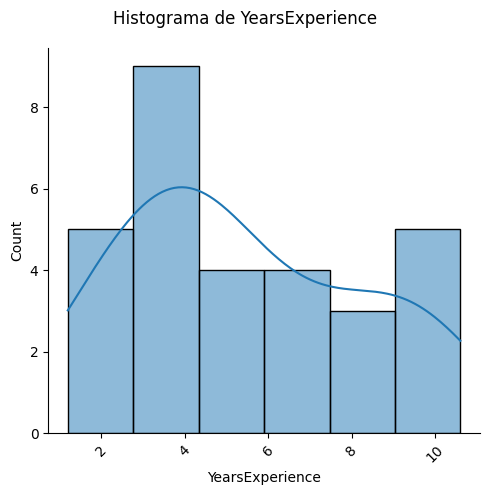

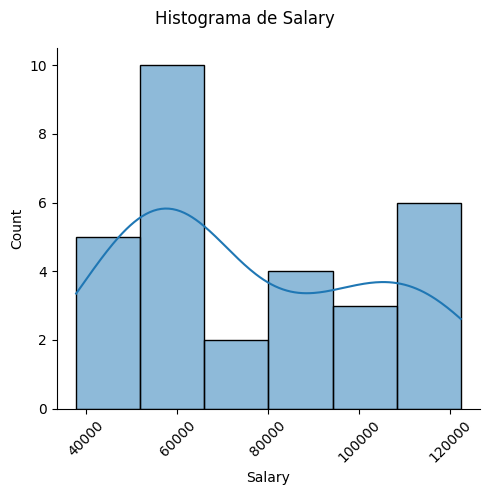

In [ ]:
# Graficamos un histograma por variable
for col in df.columns:
  g = sns.displot(data=df, x=col, kde=True)
  g.fig.suptitle(f'Histograma de {col}')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

Visualizamos las observaciones de la base de datos,

<Axes: xlabel='YearsExperience', ylabel='Salary'>

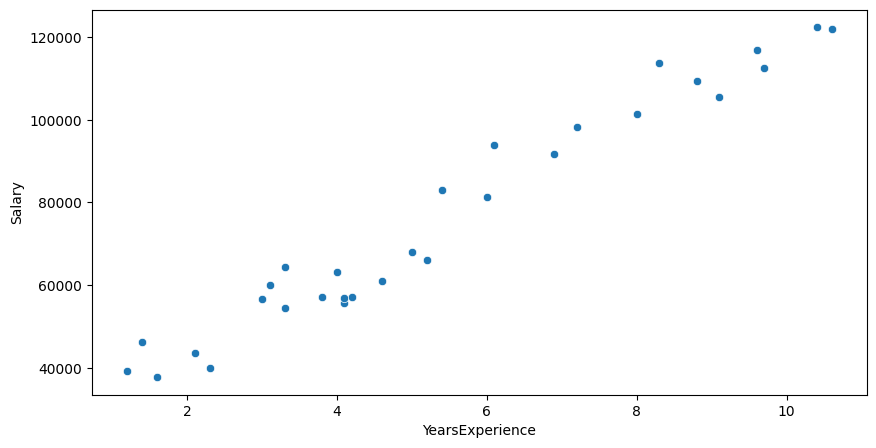

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)

In [ ]:
# Separamos variable independiente de dependiente
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Separación en Base de datos de Entrenamiento y Prueba

Se separa la base de datos en una parte de entrenamiento y otra de prueba,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=101)

## Entrenamiento del Modelo

Creando el modelo de Regresión Lineal,

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Rendimiento del Modelo

Una de las partes más importantes es evaluar qué tan bueno es el modelo para predecir nuevas observaciones. Para ello, se emplean los KPI de Machine Learning.

In [ ]:
y_pred = model.predict(X_test)
display(y_pred)

array([ 91478.92796603, 109894.22802466,  56586.7804865 ,  82755.89109615,
        40109.93306562, 118617.26489454, 117648.03857567,  75002.08054514,
       112801.90698129, 125401.84912667])

Se grafican los datos de entrenamiento con la recta de regresión,

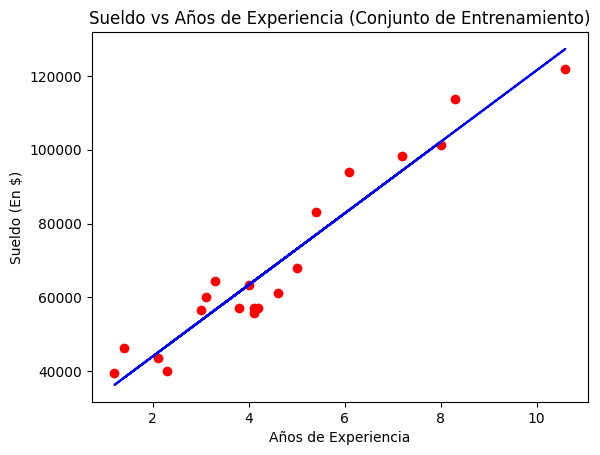

In [ ]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, model.predict(X_train), color = "blue")
plt.title("Sueldo vs Años de Experiencia (Conjunto de Entrenamiento)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (En $)")
plt.show()

Se grafican los datos de prueba en la recta de regresión,

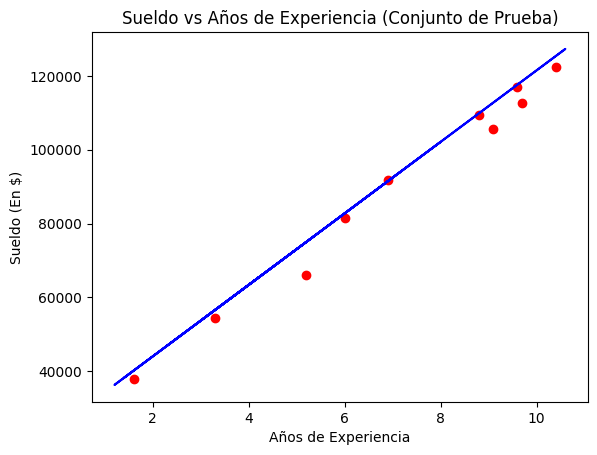

In [ ]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, model.predict(X_train), color = "blue")
plt.title("Sueldo vs Años de Experiencia (Conjunto de Prueba)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (En $)")
plt.show()

In [ ]:
# KPI's del Modelo
MAE = mean_absolute_error(y_test, y_pred)
print('MAE: {:0.2f}%'.format(MAE / np.mean(y_test) * 100))
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print('RMSE: {:0.2f}%'.format(RMSE / np.mean(y_test) * 100))
r2 = r2_score(y_test, y_pred)
print('R2: {:0.2f}'.format(r2))

MAE: 3.62%
RMSE: 4.86%
R2: 0.97


Imprimiendo los errores,

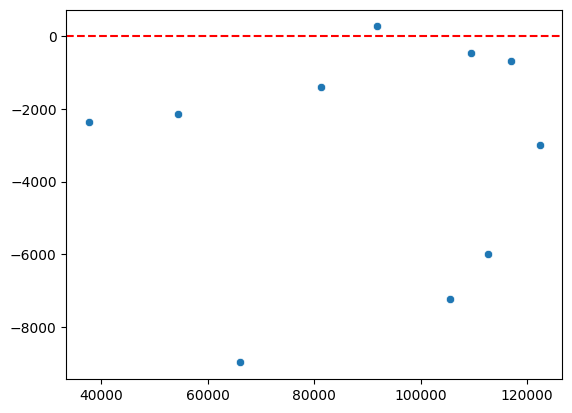

In [ ]:
test_res = y_test - y_pred
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Obteniendo los coeficientes del modelo,

In [ ]:
print("Intersección (b0):", model.intercept_)
print("Pendiente (b1):", model.coef_[0])

Intersección (b0): 24602.31196360987
Pendiente (b1): 9692.26318875602


## Referencias

*   Jacinto, V. R. (2024). Machine learning: Fundamentos, algoritmos y aplicaciones para los negocios, industria y finanzas. Ediciones Díaz de Santos.
*   James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An Introduction to Statistical Learning: with Applications in R. https://link.springer.com/content/pdf/10.1007/978-1-0716-1418-1.pdf
*   Salary Dataset - Simple linear regression. (2023, January 10). Kaggle. https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression?resource=download

